In [235]:
import pandas as pd
import numpy as np

import scipy.stats as stats

# load data
df = pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [236]:

# 1.Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

# Check for missing values
df.isnull().sum()
print(df.isnull().sum())


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [238]:
# 2. Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

# Calculate descriptive statistics
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [239]:
#finding correlation
df.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


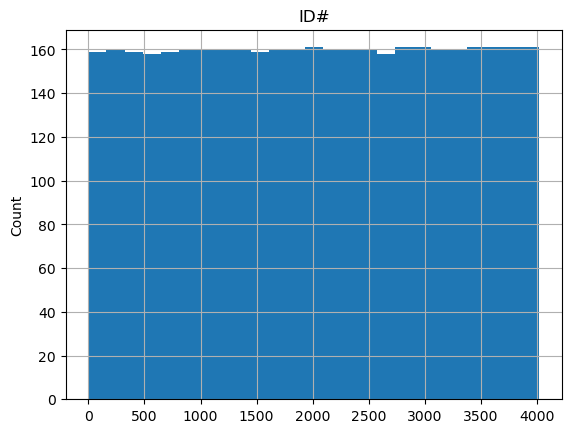

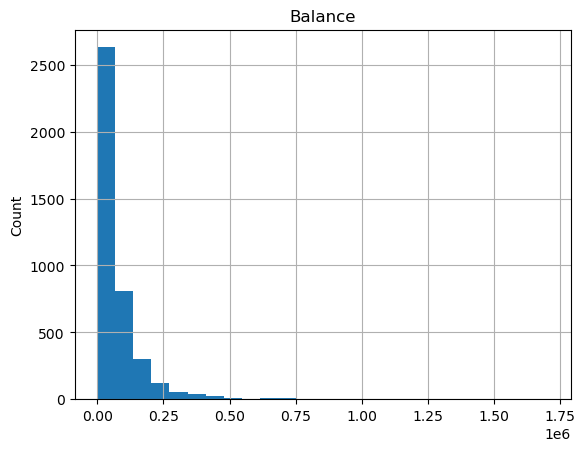

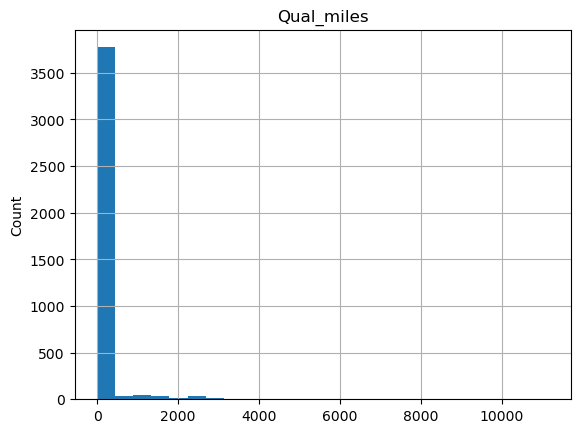

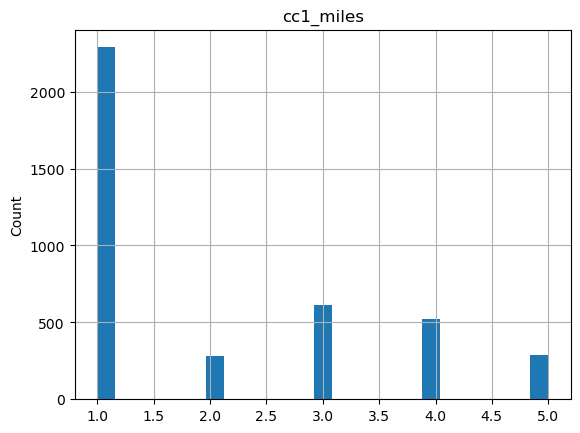

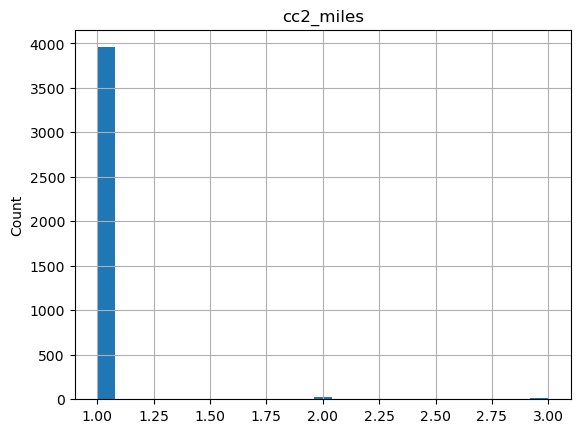

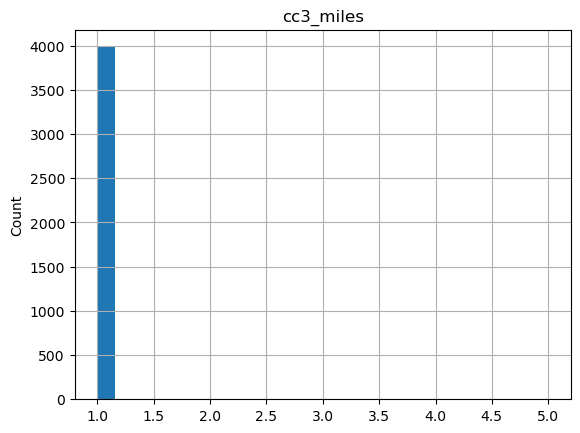

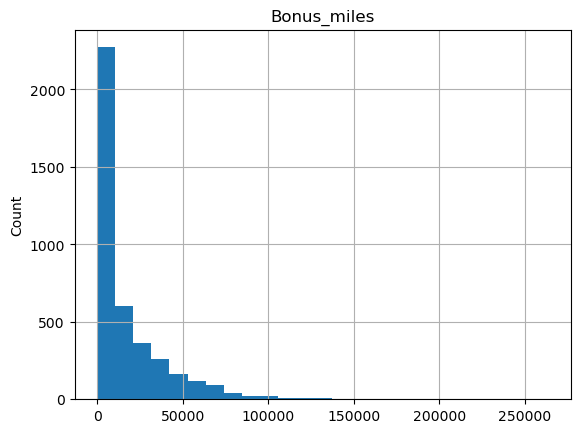

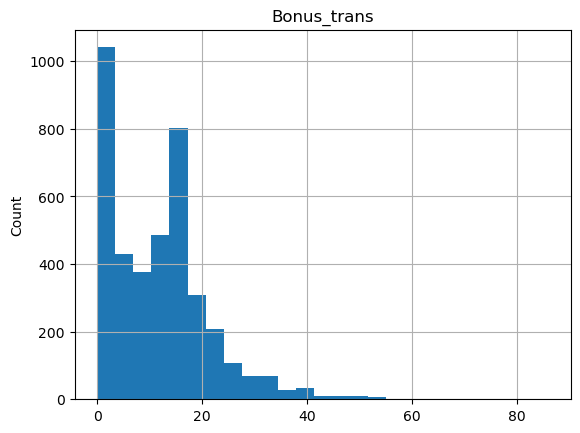

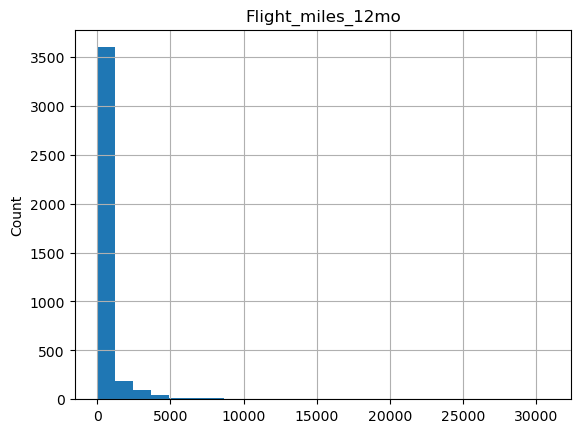

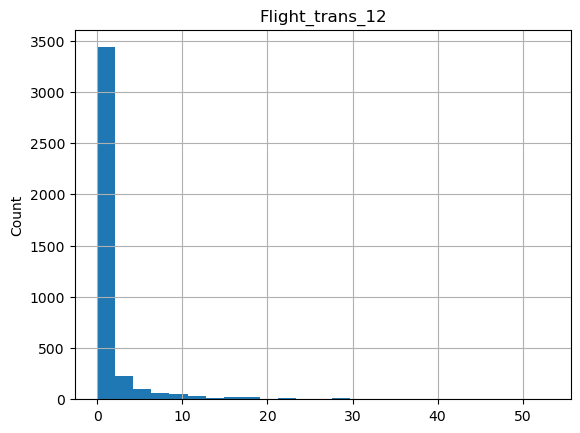

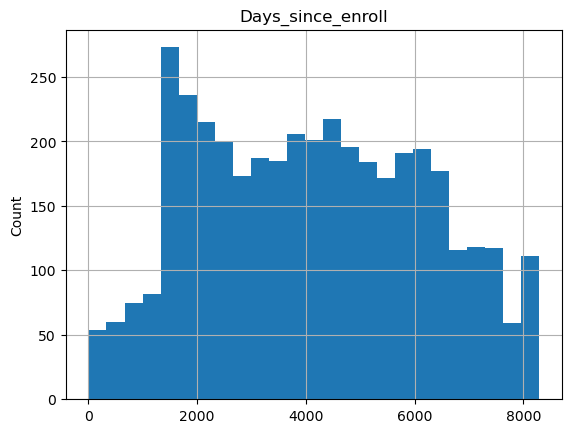

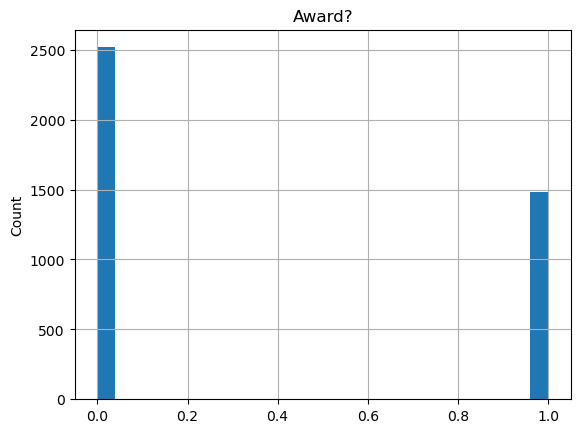

In [240]:
# 3.	Use multiple visualizations to understand the hidden patterns in the dataset
 ## Histogram 
    
import matplotlib.pyplot as plt
for i in df.columns:
    df[i].hist(bins=25)
    plt.ylabel('Count')
    plt.title(i)
    plt.show()

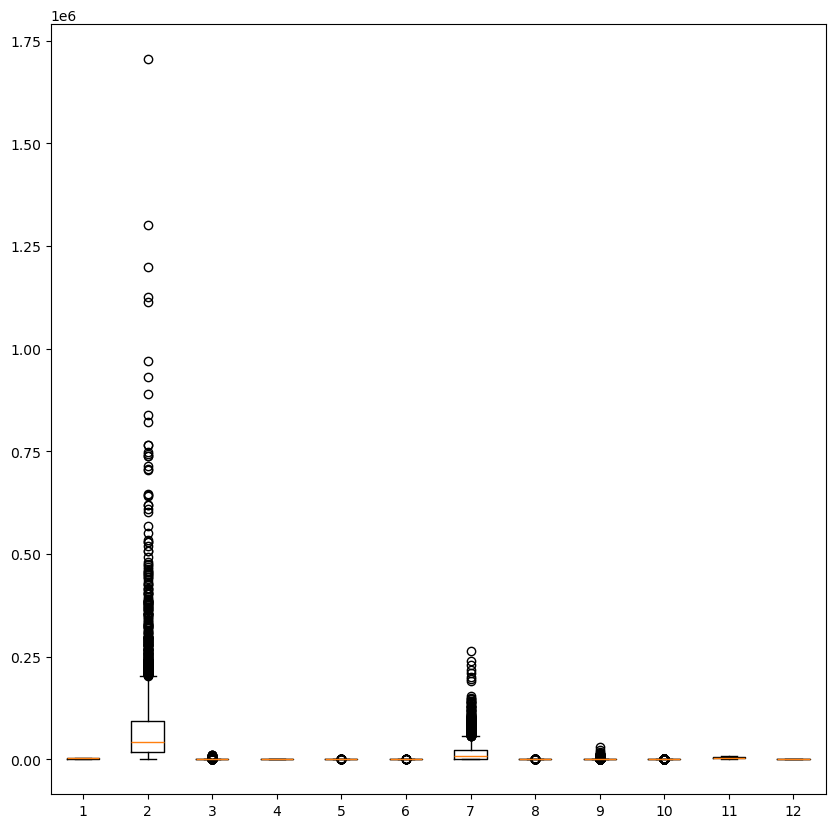

In [241]:
# box plot
fig = plt.figure(figsize =(10, 10))
plt.boxplot(df)
plt.show()


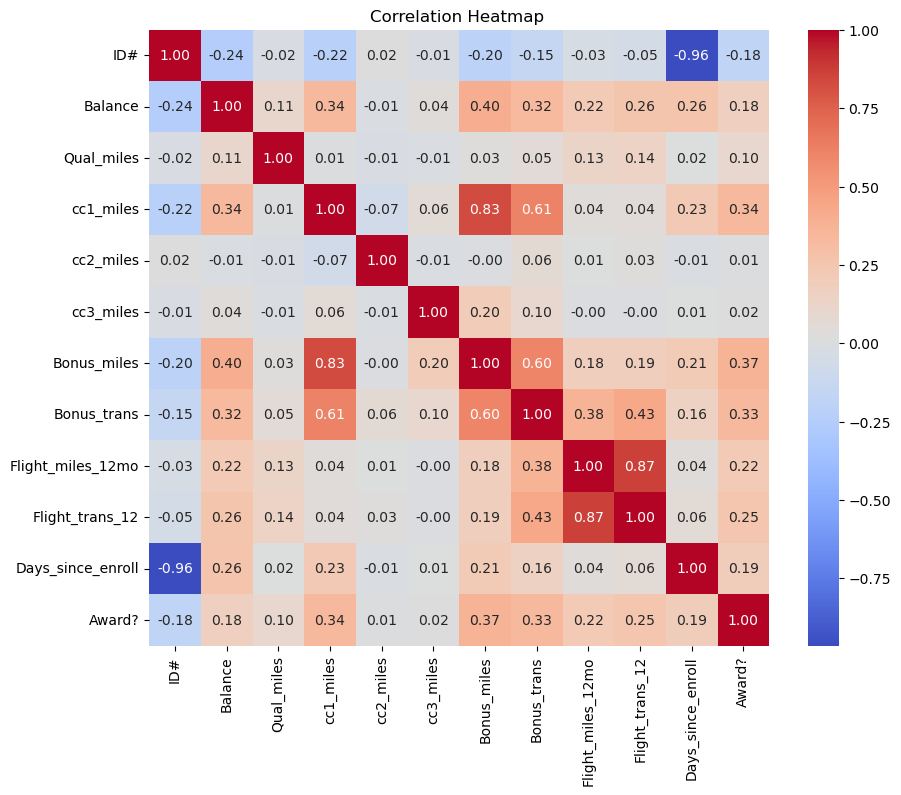

In [242]:
# Correlation heatmap for numerical variables
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap ')
plt.show() 


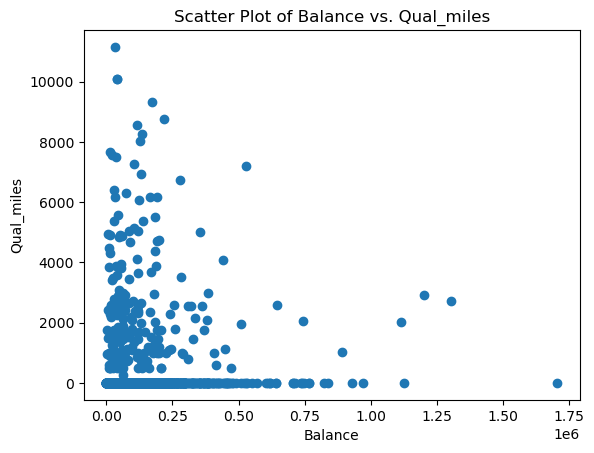

In [243]:
# Scatter plot
plt.figure()
plt.scatter(df['Balance'], df['Qual_miles'])
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.title('Scatter Plot of Balance vs. Qual_miles')
plt.show()



# Implementing Clustering Algorithms:

In [245]:
# K-MEANS
#creating random dataset
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

#normalising the data
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)
df_norm=norm_func(df.iloc[:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


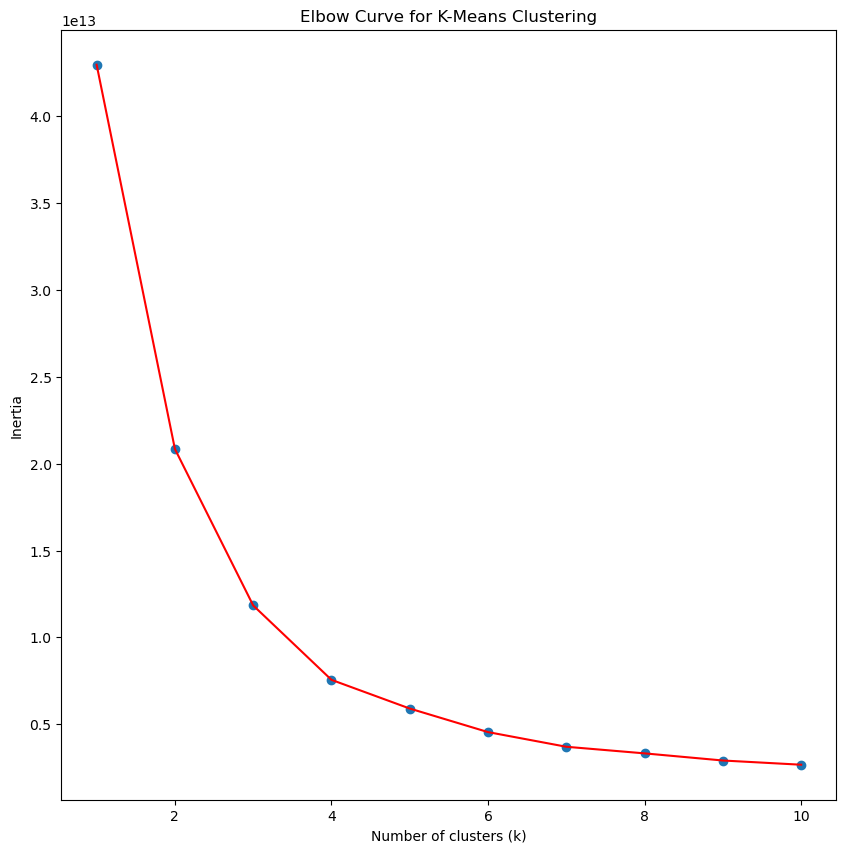

In [246]:
from sklearn.cluster import KMeans
fig=plt.figure(figsize=(10,10))
inertias = []
for i in range(1, 11):
    Kmeans = KMeans(n_clusters=i, random_state=0)
    Kmeans.fit(df)
    inertias.append(Kmeans.inertia_)

# Plot the elbow curve
plt.scatter(range(1, 11), inertias)
plt.plot(range(1, 11), inertias,color='red')
plt.title('Elbow Curve for K-Means Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [247]:
Kmeans=KMeans(n_clusters=5)
y_Kmeans=Kmeans.fit_predict(df_norm)
print(y_Kmeans)
print(Kmeans.cluster_centers_)


[0 0 0 ... 4 0 0]
[[ 2.37681325e-02  8.07125209e-03  2.24748810e-02  8.98995241e-03
   1.05764146e-03  1.25750315e-02  7.51540344e-02  7.35667765e-03
   1.24322760e-02  4.34424062e-01  3.27515792e-15]
 [ 5.94946699e-02  3.04812598e-02  3.60169492e-02  1.69491525e-02
   4.23728814e-03  3.43691417e-02  1.22815662e-01  3.33007370e-02
   6.06012152e-02  7.13270024e-01  1.00000000e+00]
 [ 6.71543219e-02  1.87153042e-02  7.50677507e-01  6.77506775e-04
   7.11382114e-03  1.81555444e-01  2.39128380e-01  2.42095725e-02
   4.24144807e-02  6.18872950e-01  1.00000000e+00]
 [ 6.92010150e-02  7.21537510e-03  6.40350877e-01  7.97448166e-04
   5.58213716e-03  1.17843075e-01  2.00289307e-01  7.30214826e-03
   1.19466763e-02  5.38787863e-01 -4.44089210e-16]
 [ 3.51912456e-02  1.87855753e-02  1.24678663e-01  1.28534704e-02
   3.90312782e-18  4.16301136e-02  1.33257607e-01  2.97032495e-02
   5.11228598e-02  2.98923309e-01  1.00000000e+00]]


In [248]:
from sklearn.preprocessing import StandardScaler
import sklearn

#Evaluating the quality of clustering using internal evaluation metrics such as silhouette scorefor KMeans
sklearn.metrics.silhouette_score(X, y_Kmeans)

0.20014272640309386

In [249]:
Kmeans.inertia_

408.32465909782155

<>:12: SyntaxWarning: invalid escape sequence '\i'
<>:12: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Adarsh\AppData\Local\Temp\ipykernel_12812\4052757037.py:12: SyntaxWarning: invalid escape sequence '\i'
  plt.xlabel('\index')


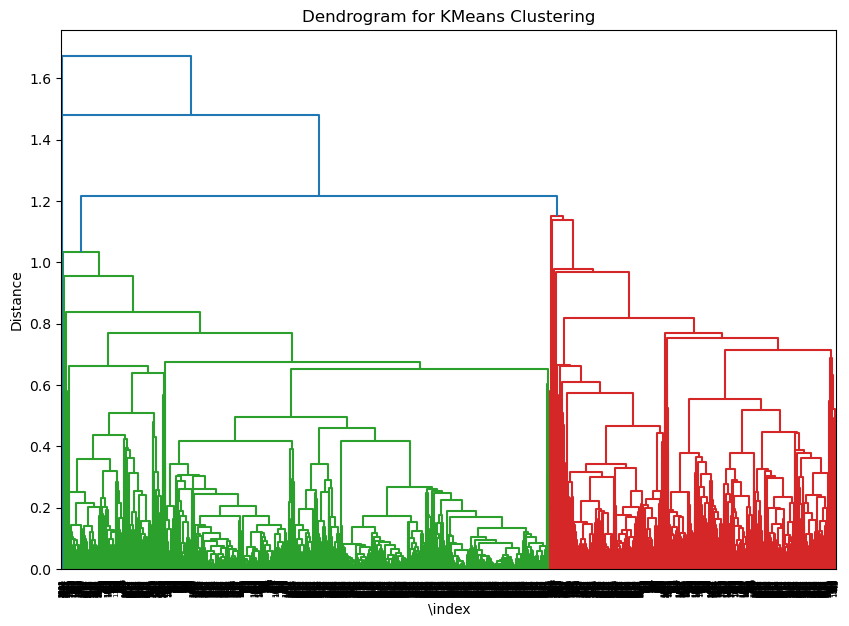

In [250]:
#plotting Dendrogram for KMeans

from scipy.cluster.hierarchy import  linkage
import scipy.cluster.hierarchy as sch


#Create linkage matrix for dendrogram
Z = linkage(df_norm, method='average', metric='euclidean')

#Plot dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(Z)
plt.title('Dendrogram for KMeans Clustering')
plt.xlabel('\index')
plt.ylabel('Distance')
plt.show()

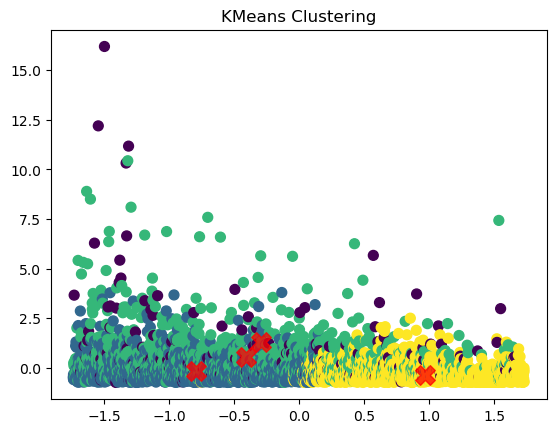

In [307]:
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('KMeans Clustering')
plt.show()

# DBSCAN


In [252]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [253]:
array=df.values
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [254]:
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [255]:
dbscan=DBSCAN(eps=0.475, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.475)

In [256]:
dbscan.labels_

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

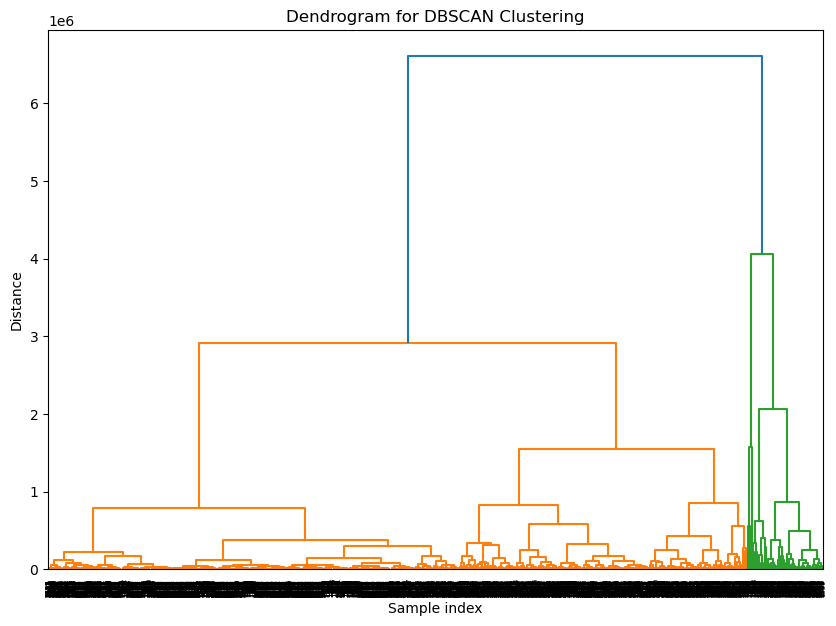

In [257]:
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage



#DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_

#Create linkage matrix for dendrogram
Z = linkage(df, 'ward')

#Plot dendrogram for DBSCAN
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for DBSCAN Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [258]:
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=3)
y_Kmeans=Kmeans.fit_predict(X
                           )
y_Kmeans

array([0, 0, 0, ..., 1, 1, 1])

In [259]:
cl1=pd.DataFrame(y_Kmeans,columns=['Kcluster'])
cl1

,Kcluster
0,0
1,0
2,0
3,0
4,2
...,...
3994,1
3995,1
3996,1
3997,1


In [260]:
df2=pd.concat([df,cl1],axis=1)
df2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kcluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [261]:
from sklearn.preprocessing import StandardScaler
import sklearn

#Evaluating the quality of clustering using internal evaluation metrics such as silhouette scorefor DBSCAN.
from sklearn.cluster import DBSCAN
sklearn.metrics.silhouette_score(X, y_Kmeans)

0.2019295117024261

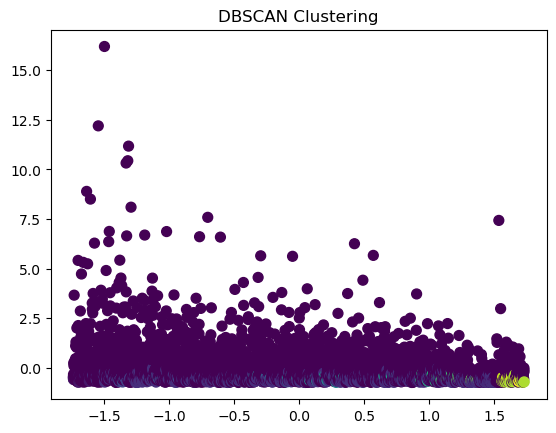

In [319]:

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()